# [Seaborn을 사용한 데이터 분포 시각화](http://seaborn.pydata.org/)
* Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지임
* 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존함

# Seaborn을 사용한 데이터 분포 시각화 : 1차원 분포 플롯
* 1차원 데이터는 실수 값이면 히스토그램과 같은 실수 분포 플롯으로 나타내고 카테고리 값이면 카운트 플롯으로 나타냄

## DataSets 참조
* [iris](https://github.com/mwaskom/seaborn-data/blob/master/iris.csv)
* [titanic](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)
* [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv)
* [flight](https://github.com/mwaskom/seaborn-data/blob/master/flights.csv)

### 샘플 데이터를 로드

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")

iris = sns.load_dataset("iris")          # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")          # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

## 1차원 실수 분포 플롯 
* 실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로 Matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등을 제공함
* 1차원 실수 분포 플롯 함수에는 rugplot, kdeplot, distplot이 있음

### 1차원 실수 분포 플롯 : [rugplot](http://seaborn.pydata.org/generated/seaborn.rugplot.html)
* 러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여줌

150


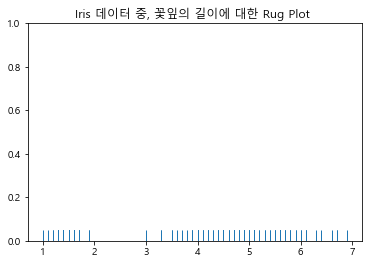

In [3]:
plt.rc('font', family ='Malgun Gothic')

x = iris.petal_length.values
print(len(x))
sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

### 1차원 실수 분포 플롯 : [커널 밀도(kernel density)](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
* 커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법임<br>
* 커널 밀도 추정에 대한 자세한 내용은 [scikit-learn 패키지를 참조](https://scikit-learn.org/stable/modules/density.html) 

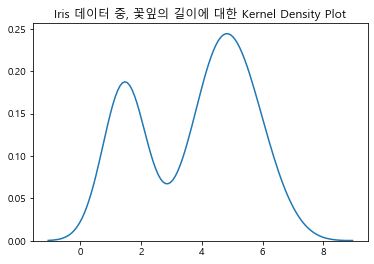

In [4]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

### 1차원 실수 분포 플롯 : [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)
* Seaborn의 distplot 명령은 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용됨

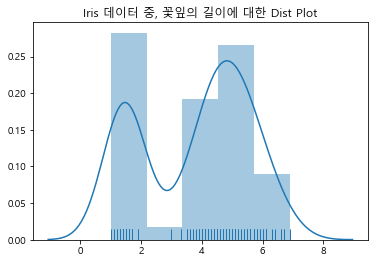

In [5]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

### 1차원 실수 분포 플롯 : [countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html)
* countplot 함수를 사용하면 각 카테고리 값 별로 데이터가 얼마나 있는지 표시할 수 있음
* countplot 함수는 데이터프레임에만 사용할 수 있음<br>
 countplot(x="column_name", data=dataframe)

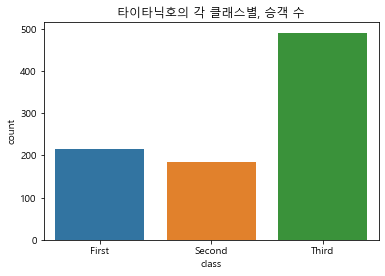

In [6]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

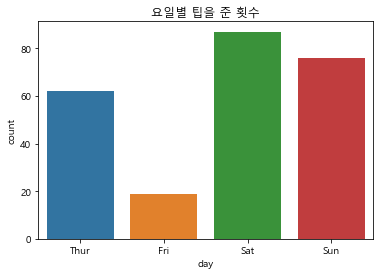

In [7]:
# LAB
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

# Seaborn을 사용한 데이터 분포 시각화 : 다차원 데이터
### 데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있을 수 있음
* 분석하고자 하는 데이터가 모두 실수 값인 경우
* 분석하고자 하는 데이터가 모두 카테고리 값인 경우
* 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

## 2차원 실수형 데이터 : [jointplot]( http://seaborn.pydata.org/generated/seaborn.jointplot.html)
* 데이터가 2차원이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용하면 됨
* 스캐터 플롯을 그리기 위해서는 Seaborn 패키지의 jointplot 명령을 사용함
* jointplot 명령은 스캐터 플롯뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램도 그림
* jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')

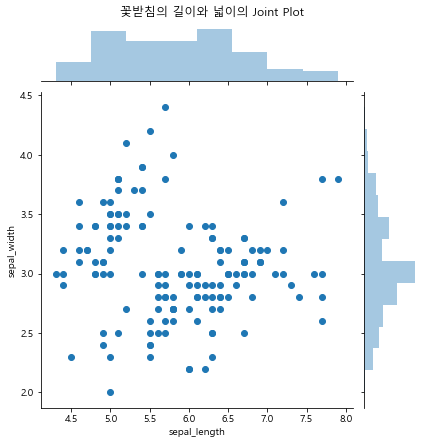

In [8]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

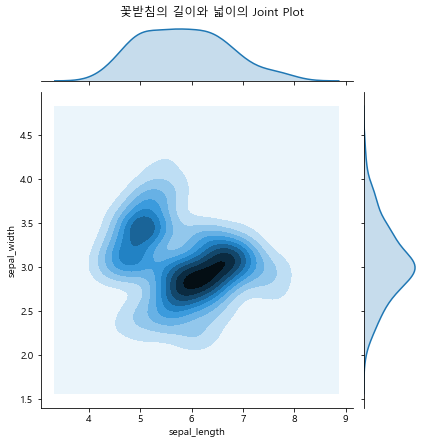

In [9]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='kde') # default:scatter
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

## 다차원 실수형 데이터 : [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html)
* 만약 3차원 이상의 데이터라면 seaborn 패키지의 pairplot 함수를 사용함
* pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그림
* 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그림
* 만약 카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있음

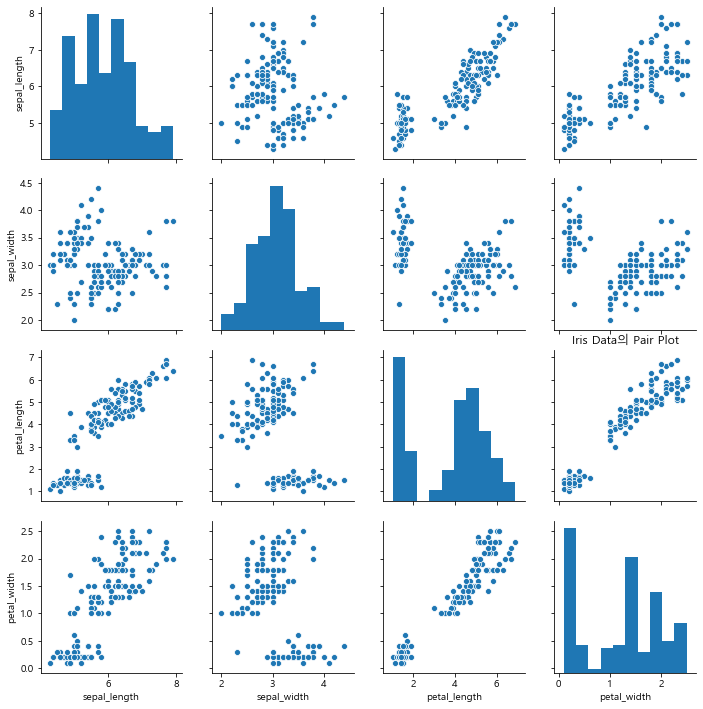

In [10]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

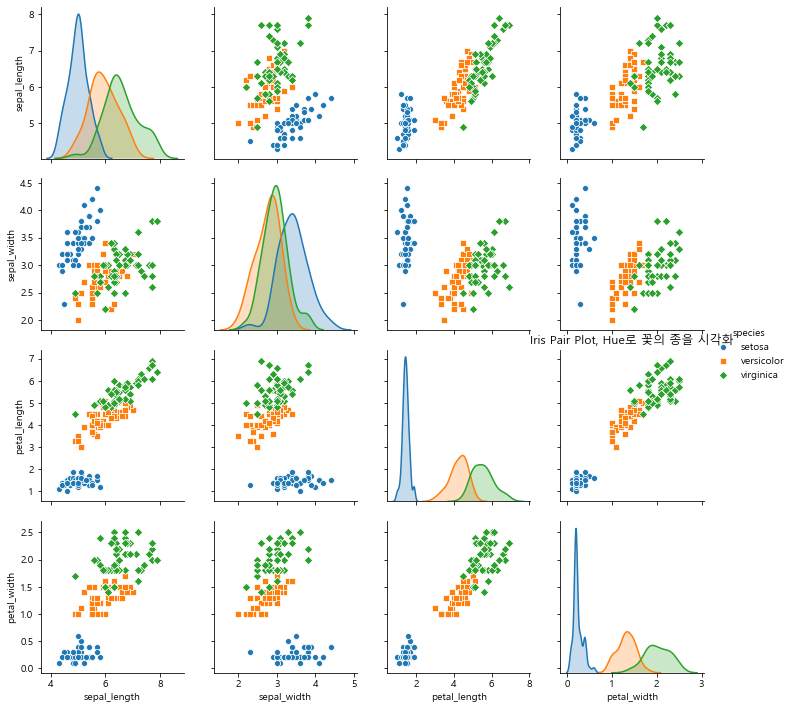

In [11]:
# 만약 카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있음 
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

## 2차원 카테고리 데이터 : [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)
* 데이터가 2차원이고 모든 값이 카테고리 값이면 heatmap 함수를 사용함

In [12]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


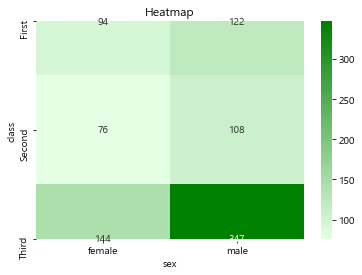

In [14]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "green", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

## 2차원 복합 데이터
### 만약 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용할 수 있음
* barplot
* boxplot
* pointplot
* violinplot
* stripplot
* swarmplot

### 2차원 복합 데이터 : [barplot](http://seaborn.pydata.org/generated/seaborn.barplot.html)
* barplot 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성
* 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시함

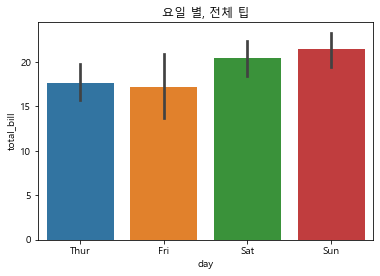

In [15]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

### 2차원 복합 데이터 : [boxplot](http://seaborn.pydata.org/generated/seaborn.boxplot.html)
* boxplot 함수는 박스-휘스커 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 부르는 차트를 그려줌
* 박스 플롯은 박스와 박스 바깥의 선(whisker)으로 이루어짐
* 데이터의 최소값, 1사분위수, 중위수(2사분위수), 평균, 3사분위수, 최대값을 구하여 표현함
* 박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고 이 3사분위수와 1사분위수의 차이(Q3 - Q1)를 IQR(interquartile range)라고 함
* 박스 내부의 가로선은 중앙값을 나타냄
* 박스 외부의 세로선은 1사분위 수보다 1.5 x IQR 만큼 낮은 값과 3사분위 수보다 1.5 x IQR 만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분임
* 그 바깥의 점은 아웃라이어(outlier)라고 부르는데 일일히 점으로 표시함

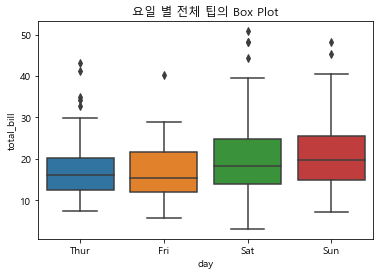

In [16]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

### 2차원 복합 데이터 : [violinplot](http://seaborn.pydata.org/generated/seaborn.violinplot.html)
* boxplot이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주는데 반해 violinplot, stripplot, swarmplot 등은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있음
* violinplot은 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보임

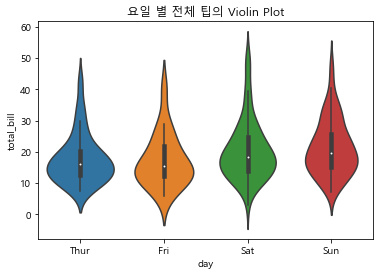

In [17]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

### 2차원 복합 데이터 : [stripplot](http://seaborn.pydata.org/generated/seaborn.stripplot.html)
* stripplot은 마치 스캐터 플롯처럼 모든 데이터를 점으로 그려줌
* jitter=True를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 함

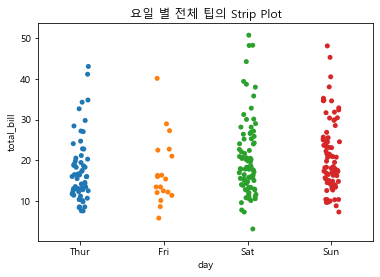

In [18]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

### 2차원 복합 데이터 : [swarmplot](http://seaborn.pydata.org/generated/seaborn.swarmplot.html)
* swarmplot은 stripplot과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동함

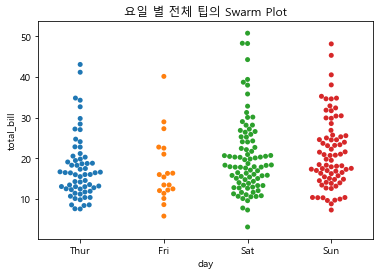

In [19]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()

## 다차원 복합 데이터
* 지금까지 소개한 대부분의 함수에는 2차원 이상의 고차원 데이터에 대해서도 분석할 수 있는 기능이 포함되어 있음
* 예를 들어 barplot, violinplot, boxplot 등 에서는 두 가지 카테고리 값에 의한 실수 값의 변화를 보기 위한 hue 인수를 제공함
* hue 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화됨
* hue 값이 시각화되는 방법은 플롯의 종류에 따라 다름

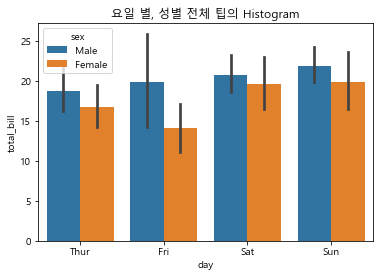

In [20]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

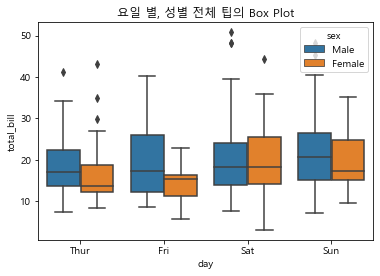

In [21]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

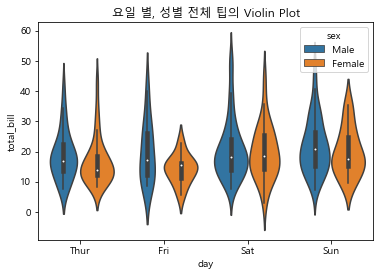

In [22]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()

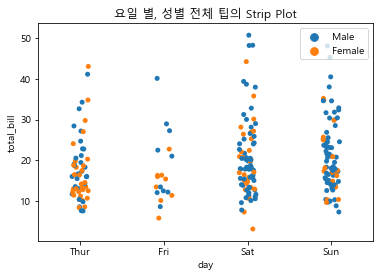

In [23]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)  # loc=2 : left-top
plt.show()

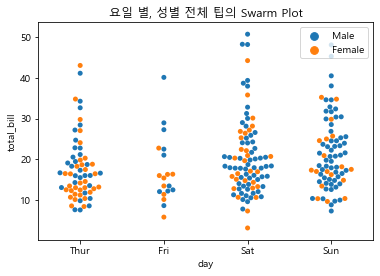

In [24]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot")
plt.legend(loc=1)
plt.show()

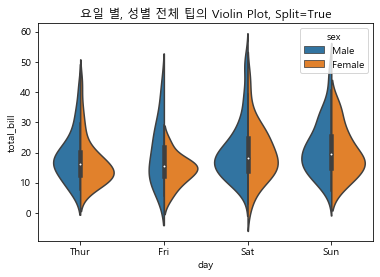

In [25]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
plt.title("요일 별, 성별 전체 팁의 Violin Plot, Split=True")
plt.show()

stripplot, violinplot, swarmplot 등 에서는 split 또는 dodge 옵션으로 시각화 방법을 변경할 수도 있음

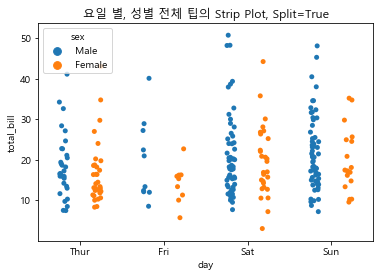

In [26]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot, Split=True")
plt.show()

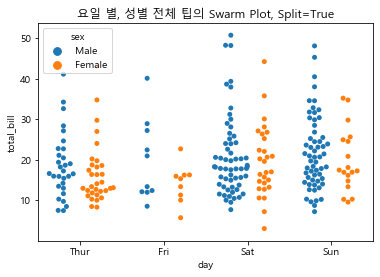

In [27]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot, Split=True")
plt.show()

[heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있음

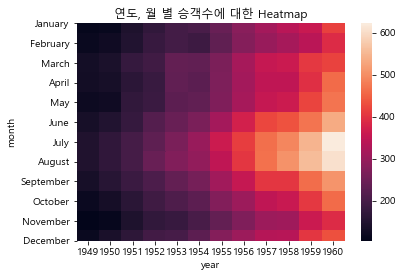

In [32]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers)
plt.show()

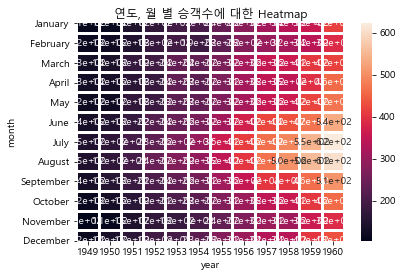

In [33]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, linewidths=2)
plt.show()

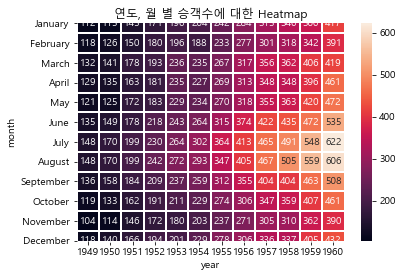

In [34]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

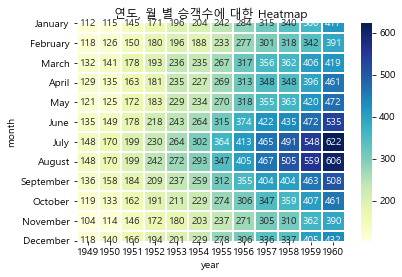

In [35]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", cmap="YlGnBu", linewidths=1)
plt.show()

## [catplot](http://seaborn.pydata.org/generated/seaborn.catplot.html)
* catplot은 색상(hue)과 행(row) 등을 동시에 사용하여 3 개 이상의 카테고리 값에 의한 분포 변화를 보여줌

C:\Users\shkim\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shkim\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


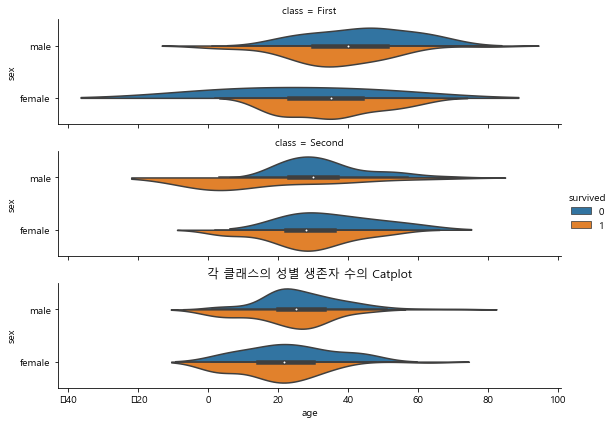

In [36]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

## 기타
* 시각화 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표시할 수도 있음

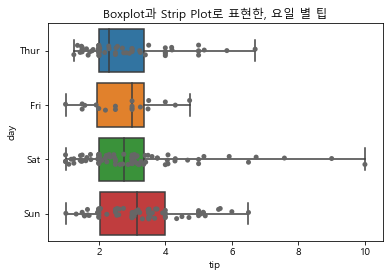

In [37]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

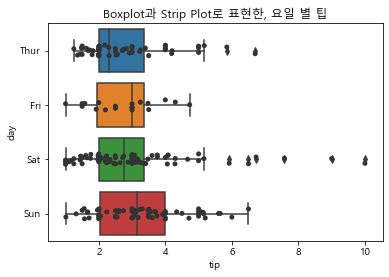

In [38]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.2")
plt.show()

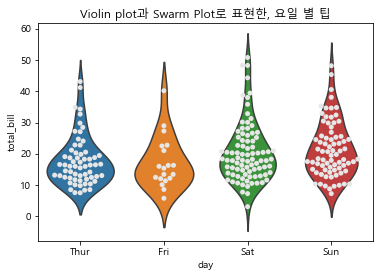

In [39]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()

## Seaborn을 사용한 데이터 분포 시각화 : [스타일](http://seaborn.pydata.org/tutorial/aesthetics.html)
* Seaborn을 임포트하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 바꿈
* 따라서 동일한 Matplotlib 함수를 수행해도 Seaborn을 임포트 한 것과 하지 않은 플롯은 모양이 다름

C:\Users\shkim\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shkim\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


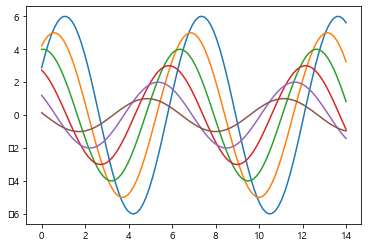

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family ='Malgun Gothic')

def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        
sinplot()

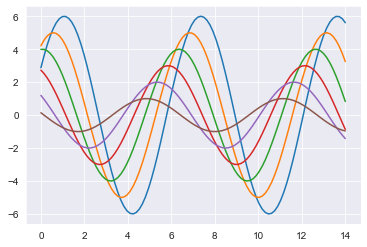

In [41]:
sns.set_style("darkgrid")
sinplot()

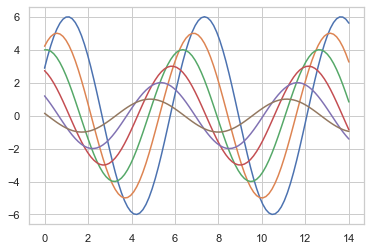

In [42]:
sns.set(style="whitegrid")
sinplot()

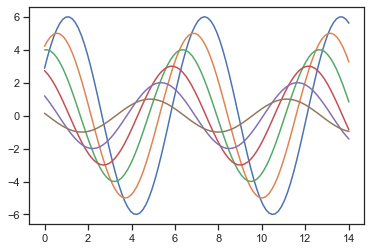

In [43]:
sns.set_style("ticks")
sinplot()

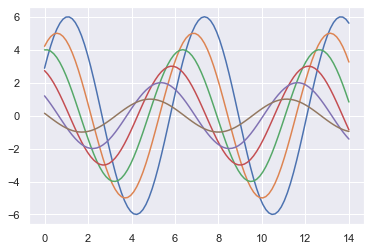

In [44]:
sns.set()
sinplot()

## Seaborn을 사용한 데이터 분포 시각화  : [lmplot]()을 이용한 회귀 판단하기

C:\Users\shkim\Anaconda3\envs\eda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


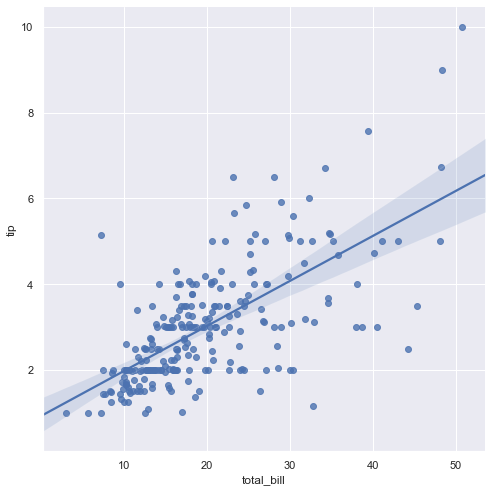

In [45]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, size=7)
plt.show()

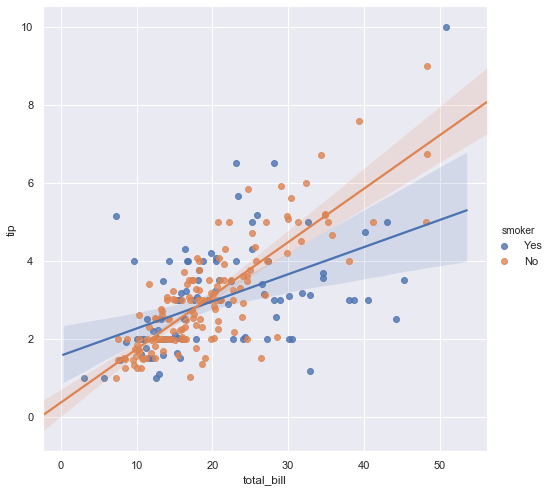

In [46]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, size=7)
plt.show()